<a href="https://colab.research.google.com/github/MudassarAQazi/Three-Layer-Neural-Network/blob/main/Three_Layer_FCNN_fromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Three Layer Neural Network From Scratch**

In [1]:
import numpy as np

In [2]:
class FCLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [3]:
class ActivationLayer:
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.activation_prime(self.input)

In [4]:
# bonus
class FlattenLayer:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

In [5]:
# bonus
class SoftmaxLayer:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [7]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

def sse(y_true, y_pred):
    return 0.5 * np.sum(np.power(y_true - y_pred, 2))

def sse_prime(y_true, y_pred):
    return y_pred - y_true

In [8]:
from tensorflow import keras
# from keras.datasets import mnist
from keras.utils import np_utils

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Preprocessing data
x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

170498071/170498071 [==============================] - 2s 0us/step


In [9]:
# unlike the Medium article, I am not encapsulating this process in a separate class
# I think it is nice just like this
network = [
    FlattenLayer(input_shape=(32, 32, 3)),
    FCLayer(32*32*3, 512),
    ActivationLayer(relu, relu_prime),
    FCLayer(512, 128),
    ActivationLayer(relu, relu_prime),
    FCLayer(128, 10),
    SoftmaxLayer(10)
]

epochs = 40
learning_rate = 1
errors = []

# training
for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):
        # forward
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # error (display purpose only)
        error += mse(y_true, output)

        # backward
        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train)
    print('%d/%d, error=%f, Cost' % (epoch + 1, epochs, error))

1/40, error=0.090090
2/40, error=0.089164
3/40, error=0.088985
4/40, error=0.088125
5/40, error=0.088045
6/40, error=0.088185
7/40, error=0.088383
8/40, error=0.090208
9/40, error=0.089613
10/40, error=0.088174
11/40, error=0.089895
12/40, error=0.089647
13/40, error=0.088845
14/40, error=0.089352
15/40, error=0.090193
16/40, error=0.089912
17/40, error=0.089638
18/40, error=0.088723
19/40, error=0.090011
20/40, error=0.089596
21/40, error=0.090099
22/40, error=0.090098
23/40, error=0.090098
24/40, error=0.090098
25/40, error=0.090098
26/40, error=0.090098
27/40, error=0.090098
28/40, error=0.090098
29/40, error=0.090098
30/40, error=0.090098
31/40, error=0.090098
32/40, error=0.090098
33/40, error=0.090098
34/40, error=0.090098
35/40, error=0.090098
36/40, error=0.090098
37/40, error=0.090098
38/40, error=0.090098
39/40, error=0.090098
40/40, error=0.090098


In [10]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.27
mse: 0.1076


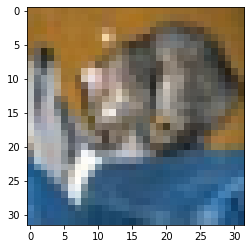

pred: 6, prob: 0.53, true: 3


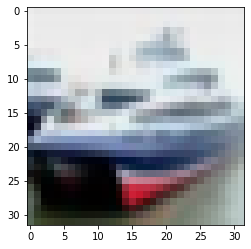

pred: 0, prob: 0.52, true: 8


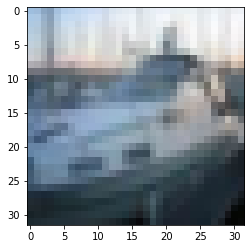

pred: 8, prob: 0.47, true: 8


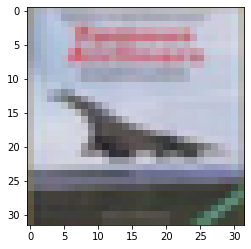

pred: 0, prob: 0.84, true: 0


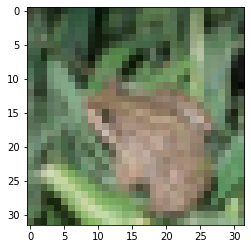

pred: 3, prob: 0.77, true: 6


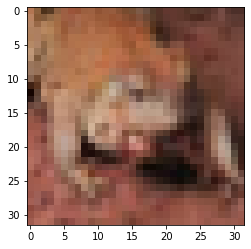

pred: 3, prob: 0.98, true: 6


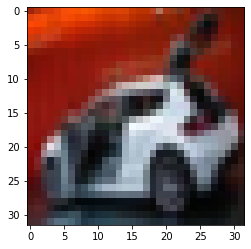

pred: 3, prob: 0.51, true: 1


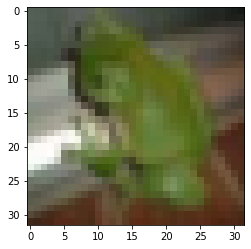

pred: 2, prob: 0.62, true: 6


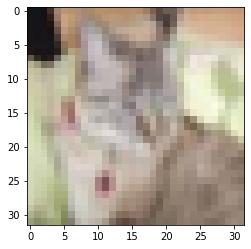

pred: 2, prob: 0.88, true: 3


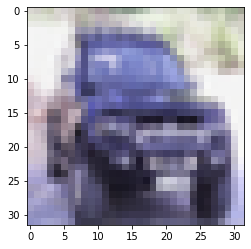

pred: 0, prob: 0.36, true: 1


In [12]:
import matplotlib.pyplot as plt

samples = 10
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (32, 32, 3))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = predict(network, test)[0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))